## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
#3 check missing values
missing_values = df.isnull().sum()
print(missing_values)

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64


4. The overview reveals a _________________________. (fill that blank on the section below)

The overview reveals a dataset with no missing values

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

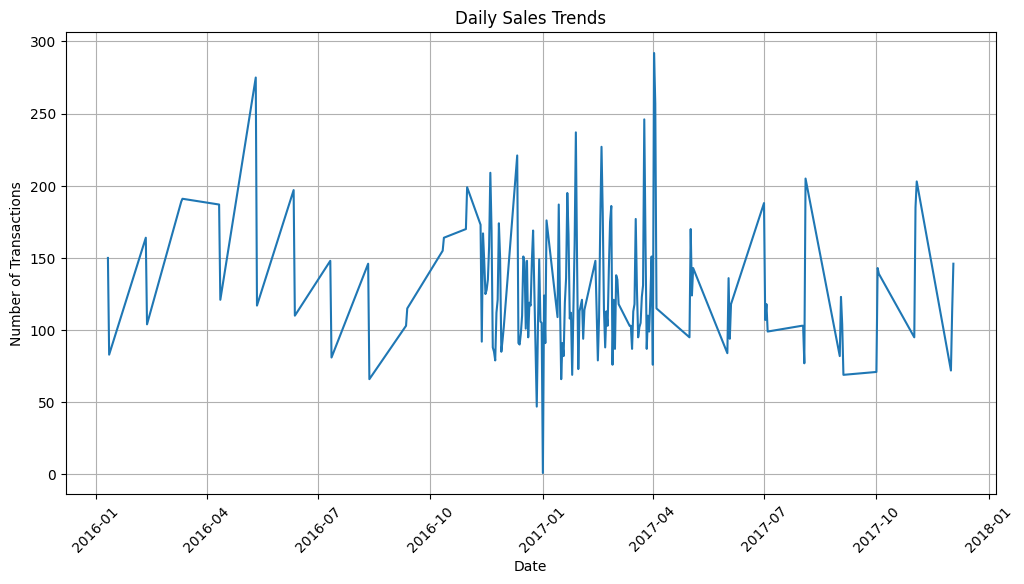

In [12]:
# 5

# Convert the 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract date and hour
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour

# Group by date to analyze daily transaction trends
daily_transactions = df.groupby('date').size()

# Visualize daily transaction trends
plt.figure(figsize=(12, 6))
daily_transactions.plot(kind='line')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [18]:
# 6

# Extract hour, day, day_name, month, year, and time
df['hour'] = df['date_time'].dt.hour
df['time'] = df['date_time'].dt.strftime('%H:%M:%S')
df['day'] = df['date_time'].dt.day
df['day_name'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

# Reorder columns as per your requirement
df = df[['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend', 'day', 'month','year','time','hour','day_name', 'date']]


# Display the updated dataframe
df.sample(5)

,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name,date
4916,2436,Medialuna,2016-02-12 10:18:00,morning,weekday,12,2,2016,10:18:00,10,Friday,2016-02-12
10093,5061,Cake,2017-01-21 12:10:00,afternoon,weekend,21,1,2017,12:10:00,12,Saturday,2017-01-21
15307,7326,Bread,2017-02-28 10:34:00,morning,weekday,28,2,2017,10:34:00,10,Tuesday,2017-02-28
3990,1949,Coffee,2016-11-24 10:02:00,morning,weekday,24,11,2016,10:02:00,10,Thursday,2016-11-24
17620,8374,Salad,2017-03-18 13:08:00,afternoon,weekend,18,3,2017,13:08:00,13,Saturday,2017-03-18



Alright, now I can easily create a visualization of monthly sales.

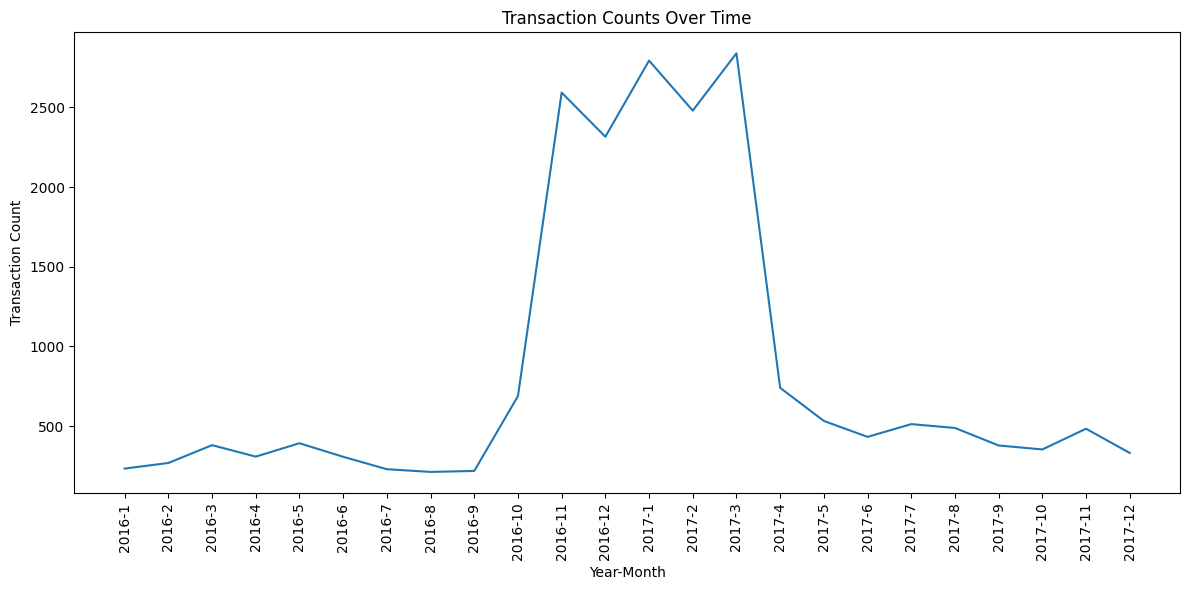

In [ ]:
# 7
# Group the data by month and year, and count the transactions  
monthly_transactions = df.groupby(['year', 'month'])['date_time'].count().reset_index()  
monthly_transactions.columns = ['year', 'month', 'transaction_count']  

# Create the 'year-month' column  
monthly_transactions['year-month'] = monthly_transactions['year'].astype(str) + '-' + monthly_transactions['month'].astype(str)  

# Sort the data by year and month  
monthly_transactions = monthly_transactions.sort_values(['year', 'month'])  

# Create the line chart  
plt.figure(figsize=(12, 6))  
plt.plot(monthly_transactions['year-month'], monthly_transactions['transaction_count'])  
plt.xticks(monthly_transactions['year-month'][::1], monthly_transactions['year-month'][::1], rotation=90)  
plt.title('Transaction Counts Over Time')  
plt.xlabel('Year-Month')  
plt.ylabel('Transaction Count')  
plt.tight_layout()  
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

The trend of transactions clearly shows the fluctuations in customer activity over time. Specifically, there are noticeable peaks in January 2017 and December 2016, suggesting higher sales during the start of the year and the holiday season. On the other hand, February 2017 and November 2016 show a decline in transactions, indicating lower customer activity during those months. 

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [ ]:
#9
# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['day_name'] = df['date_time'].dt.day_name()

# Define the weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Get unique weekdays and weekends
weekday_names = df[df['day_name'].isin(weekdays)]['day_name'].unique()
weekend_names = df[df['day_name'].isin(weekends)]['day_name'].unique()

# Output the results
print(f"Unique weekday names: {weekday_names}")
print(f"Unique weekend names: {weekend_names}")


Unique weekday names: ['Monday' 'Thursday' 'Friday' 'Wednesday' 'Tuesday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [29]:
# Group by 'month' and 'day_name' to aggregate total transactions
aggregation = df.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Pivot the data to make 'day_name' columns and 'month' rows
pivoted_aggregation = aggregation.pivot_table(index='month', columns='day_name', values='total_transactions', aggfunc='sum')

# Replace NaN with 0
pivoted_aggregation = pivoted_aggregation.fillna(0)

# Display the result
pivoted_aggregation


day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,405.0,521.0,619.0,433.0,232.0,490.0,327.0
2,516.0,338.0,516.0,367.0,497.0,322.0,192.0
3,724.0,285.0,732.0,289.0,497.0,315.0,378.0
4,0.0,444.0,76.0,292.0,0.0,236.0,0.0
5,0.0,95.0,0.0,0.0,260.0,170.0,399.0
6,136.0,0.0,291.0,228.0,84.0,0.0,0.0
7,0.0,266.0,188.0,107.0,0.0,180.0,0.0
8,271.0,0.0,0.0,0.0,223.0,103.0,103.0
9,82.0,184.0,123.0,207.0,0.0,0.0,0.0


11. Wow, it turns out the insight that can be gained from the table above is _____

 that it reveals how transaction volumes vary across different days of the week and months. By observing which days ( weekends or weekdays) 


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

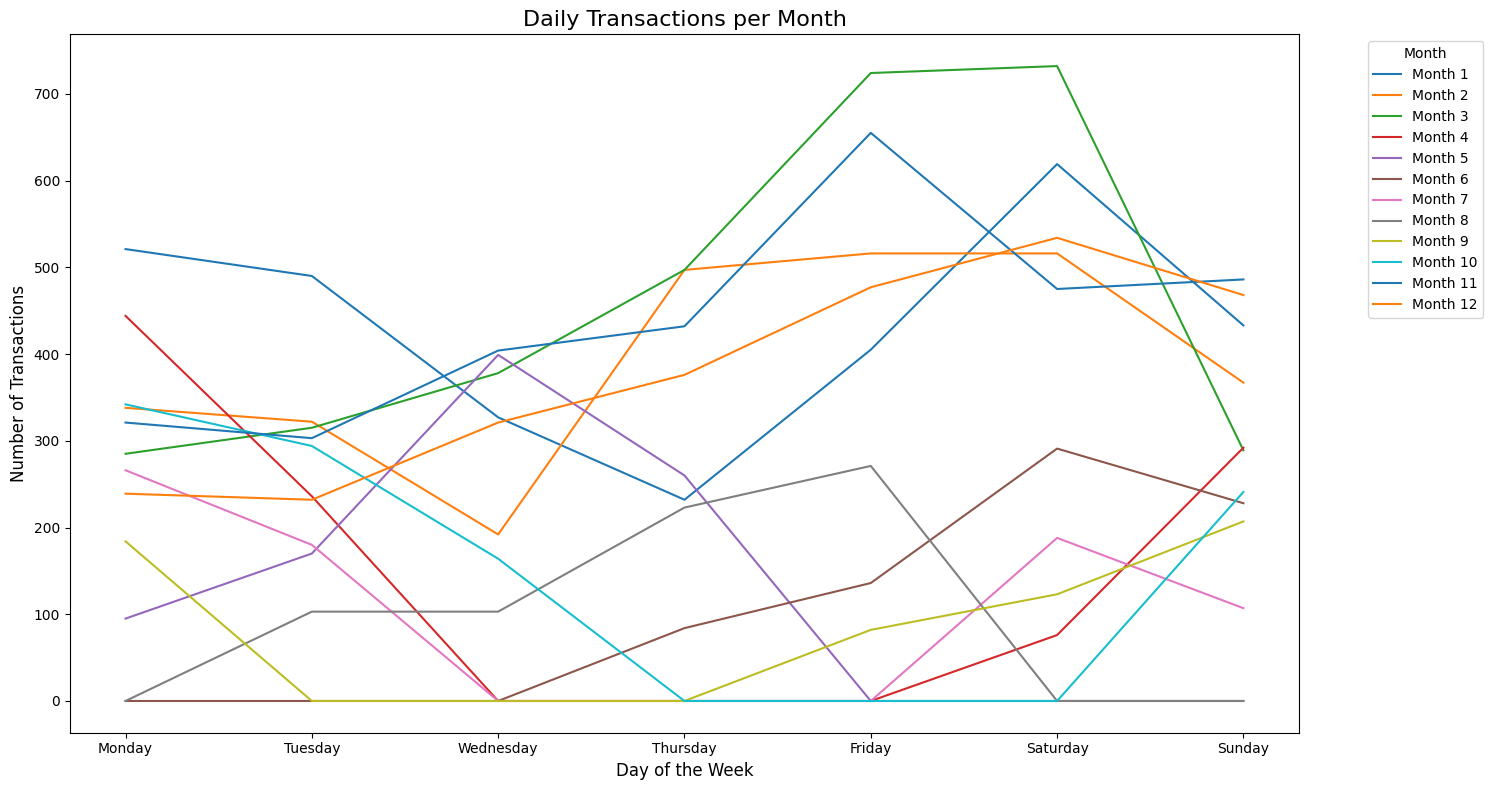

In [ ]:
# 12

# Assuming 'pivoted_aggregation' contains the day names as rows and months as columns from the pivot table

# Set up the figure
plt.figure(figsize=(15, 8))  # Adjust figsize to make the plot wider

# Plot each month's total transactions by day of the week
for month in pivoted_aggregation.columns:
    plt.plot(
        pivoted_aggregation.index,  # Day names as x-axis
        pivoted_aggregation[month],  # Total transactions for the month
        label=f'Month {month}'
    )

# Customize the plot
plt.title('Daily Transactions per Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(False)  # Remove the grid if not needed

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

show how certain days of the week consistently have higher or lower sales across different months. For instance, weekends like Saturday and Sunday tend to show higher sales, while weekdays such as Monday or Wednesday may have lower transaction volumes.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [41]:
# 14
# Get unique values in the 'period_day' column
unique_period_day = df['period_day'].unique()

# Display the unique values
print(unique_period_day)


['morning' 'afternoon' 'evening' 'night']


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [ ]:
# 15
# Filter by each period of the day and get unique hours for each period
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

# Display the results
print("Unique morning_hour:", morning_hours)
print("Unique afternoon_hour:", afternoon_hours)
print("Unique evening_hour:", evening_hours)
print("Unique night_hour:", night_hours)


Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Yes, I noticed something odd in the "Unique morning_hour" results. Specifically, **the hour "1"** appears in the morning hours, which is unusual because typically, morning hours would start from 6:00 AM or 7:00 AM, not 1:00 AM. The hour "1" suggests that there might be an error or inconsistency in how the data is categorized, especially if the system or dataset is intended to assign time periods such as morning, afternoon, evening, and night based on conventional definitions of those time periods.

This could be an issue with how the data is recorded, where "1" might be mistakenly considered as part of the "morning" time frame, when it should likely fall under "night" instead, as 1:00 AM is in the early hours of the morning (typically considered part of the night).


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

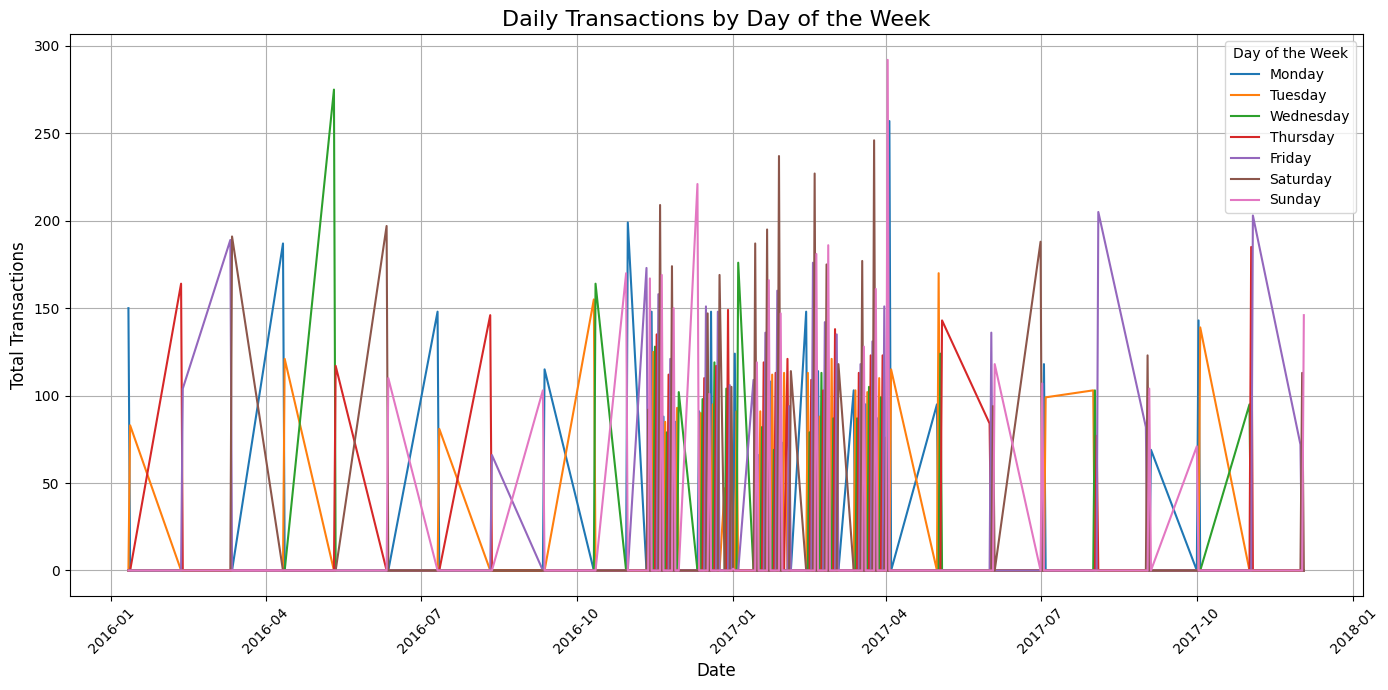

In [44]:
import matplotlib.pyplot as plt

# Group the data by 'date' and 'day_name' (the day of the week) to calculate total transactions
day_of_week_sales = df.groupby(['date', 'day_name']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 7))

# Plot each day of the week
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    if day in day_of_week_sales.columns:
        plt.plot(day_of_week_sales.index, day_of_week_sales[day], label=day)

# Customize the plot
plt.title('Daily Transactions by Day of the Week', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.legend(title='Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


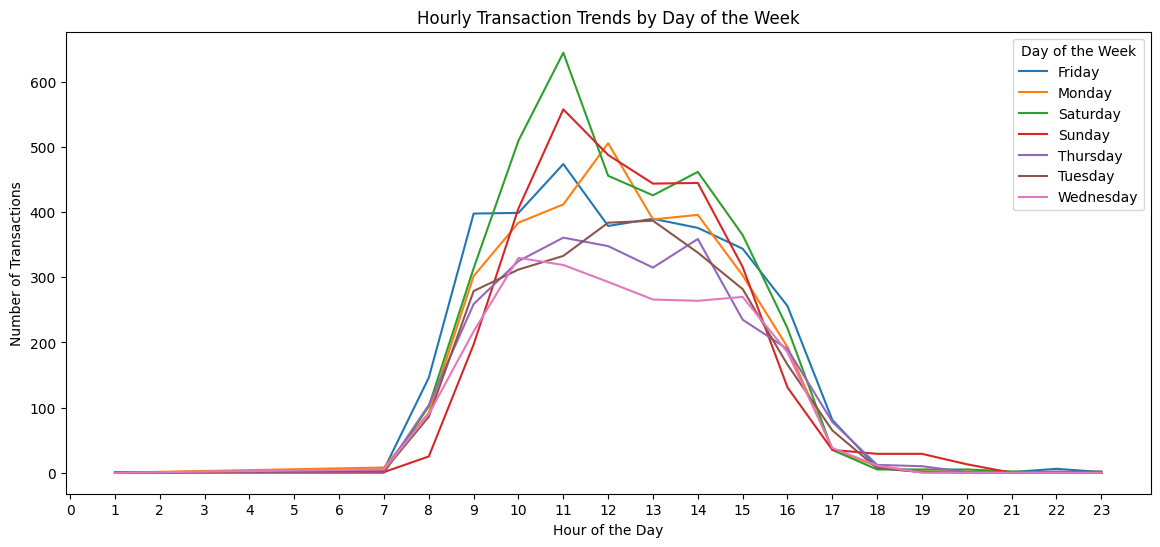

In [45]:
# 17
import matplotlib.pyplot as plt

# Aggregate transactions by hour and day_name
hourly_day_sales = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

# Create a line chart to visualize sales trends by hour for each day of the week
plt.figure(figsize=(14, 6))
for day in hourly_day_sales.columns:
    plt.plot(hourly_day_sales.index, hourly_day_sales[day], label=day)

# Customize the plot
plt.title("Hourly Transaction Trends by Day of the Week")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Ensure all hours are represented on the x-axis
plt.legend(title='Day of the Week')

# Show the plot
plt.show()

18. The daily sales trend plot reveals that _______

sales tend to peak during the afternoon and evening hours, with lower activity in the morning and late-night hours. This indicates that customers are more active and make more purchases during the midday to evening period, while morning and night transactions are comparatively sparse.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

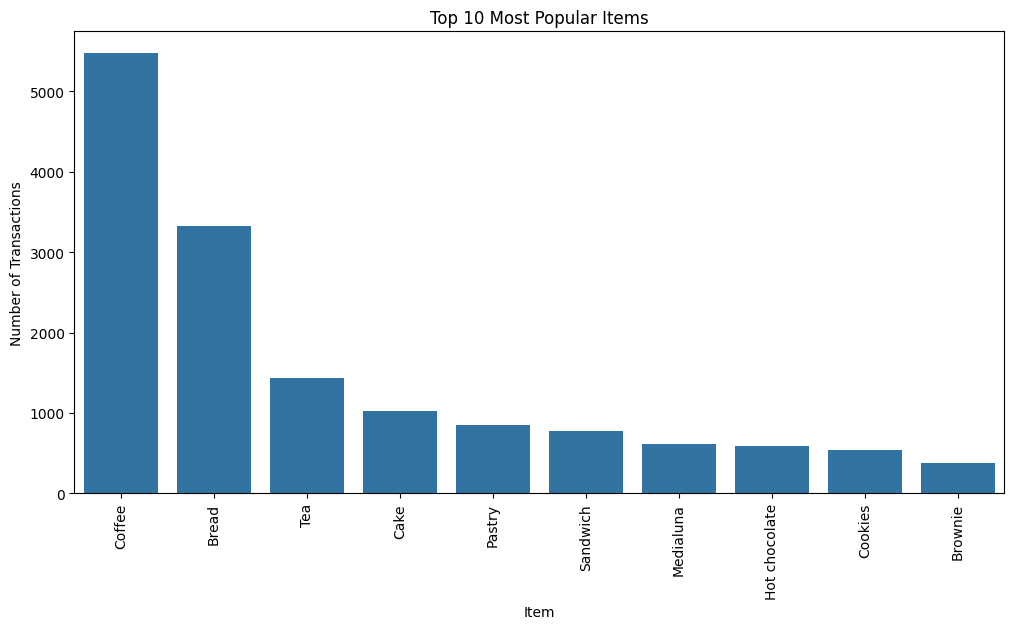

In [47]:
# 19
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

# Get the top 10 most frequent items
top_10_items = df['Item'].value_counts().head(10)

# Create a bar chart for the top 10 most popular items
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_items.index, y=top_10_items.values)
plt.title("Top 10 Most Popular Items")
plt.xlabel("Item")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19756\4093157926.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='Transaction Count', data=period_data, palette="Set2", ax=ax)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19756\4093157926.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='Transaction Count', data=period_data, palette="Set2", ax=ax)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19756\4093157926.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item', y='Transaction Count', data=period_data, pal

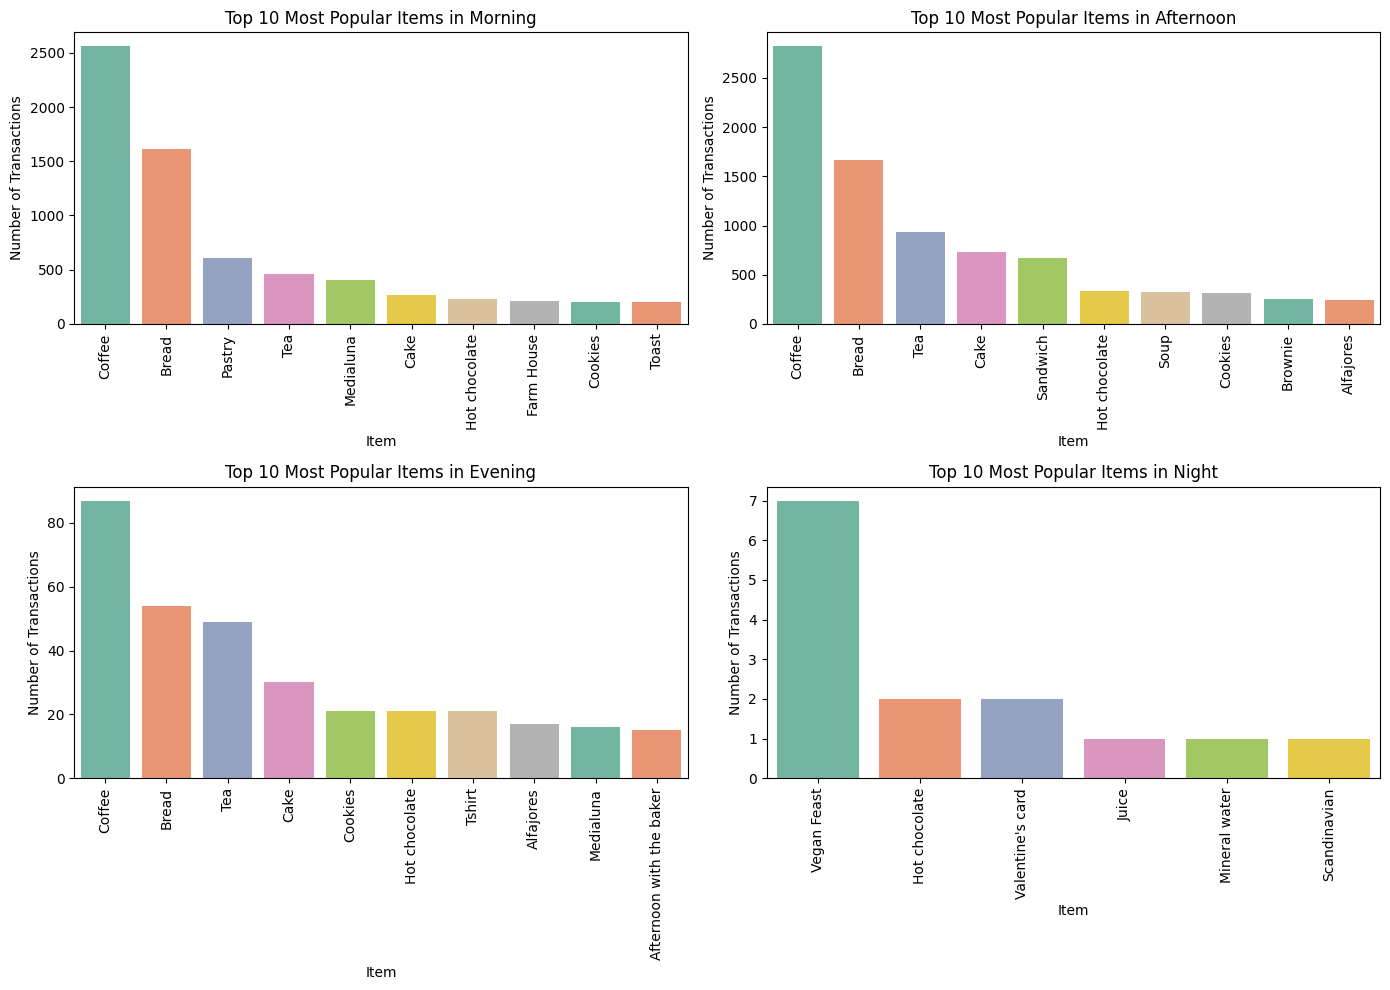

In [48]:
# 20
# Group by period and item, then count the number of transactions for each combination
period_item_counts = df.groupby(['period_day', 'Item']).size().reset_index(name='Transaction Count')

# For each period, get the top 10 most popular items based on transaction count
top_10_period_item_counts = period_item_counts.groupby('period_day', group_keys=False).apply(
    lambda x: x.nlargest(10, 'Transaction Count')
).reset_index(drop=True)

# Plotting for each period (morning, afternoon, evening, night)
periods = ['morning', 'afternoon', 'evening', 'night']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, period in enumerate(periods):
    ax = axes[i // 2, i % 2]  # Choose the subplot for each period
    period_data = top_10_period_item_counts[top_10_period_item_counts['period_day'] == period]
    sns.barplot(x='Item', y='Transaction Count', data=period_data, palette="Set2", ax=ax)
    ax.set_title(f"Top 10 Most Popular Items in {period.capitalize()}")
    ax.set_xlabel("Item")
    ax.set_ylabel("Number of Transactions")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

21. It turns out that there is something different in the plot above, the insight is ____


the product trends vary significantly throughout the day. In the morning, the most popular items are coffee, bread, and pastries, while in the afternoon, coffee, bread, and tea dominate. In the evening, coffee, bread, and tea remain popular, but at night, vegan feast, hot chocolate, and valentine cards take the lead. This shift indicates changing consumer preferences depending on the time of day, with a clear preference for more indulgent or specialty items at night.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19756\2210100365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'


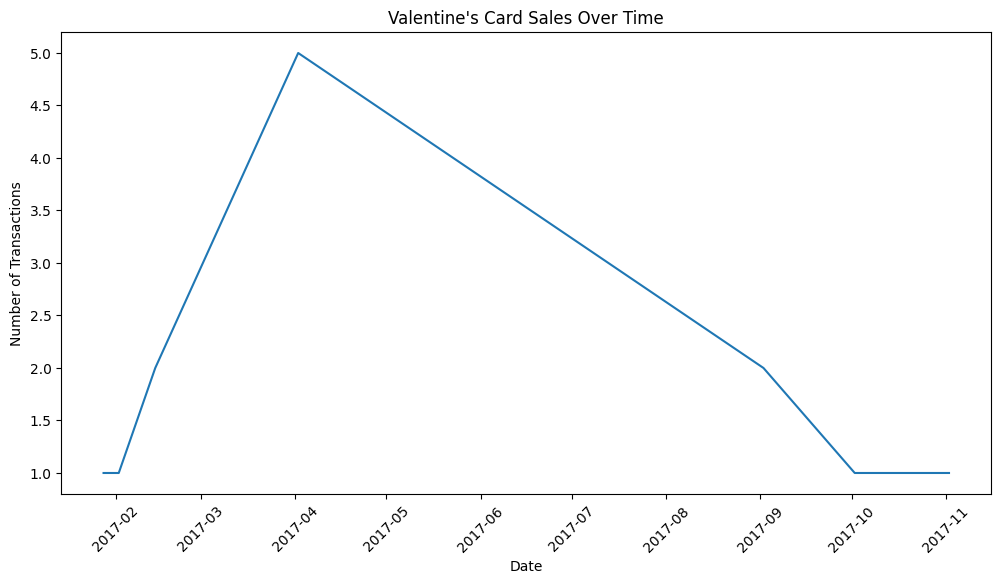

In [49]:
#22
# Assuming df is your DataFrame
# Step 1: Filter for Valentine's card transactions
valentine_sales = df[df['Item'] == "Valentine's card"]

# Step 2: Group by the 'date' column and count the number of transactions
valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'
daily_sales_valentine = valentine_sales.groupby('date').size().reset_index(name='transactions')

# Step 3: Convert 'date' column to datetime object
daily_sales_valentine['date'] = pd.to_datetime(daily_sales_valentine['date'])

# Step 4: Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_valentine['date'], daily_sales_valentine['transactions'])
plt.title("Valentine's Card Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


 that there was a sharp increase in sales starting from February 2, 2017, reaching the highest peak on February 4, 2017. After that, sales experienced a significant decline leading up to February 11, 2017, where it reached the lowest point. Interestingly, sales slightly picked up again after February 11, suggesting a small rebound potentially tied to late purchases leading up to Valentine's Day on February 14.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [ ]:
 # 24
import pandas as pd

# Assuming 'df' is your dataset
# Filter the dataset to select only the relevant items, for example, all the items you want to analyze
items = ['Afternoon with the baker', 'Alfajores', 'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell', 'Bare Popcorn', 'Basket', 'The BART', 'The Nomad', 'Tiffin', 'Toast', 'Truffles', 'Tshirt', "Valentine's card", 'Vegan Feast', 'Vegan mincepie', 'Victorian Sponge']

# Create the binary matrix for the Apriori algorithm
# We will assume the 'Item' column contains the items purchased in each transaction
# and 'Transaction' column represents the transaction identifier

# Initialize the dataframe for one-hot encoding
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

# Loop through the dataframe and set 1 where the item was purchased
for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

one_hot_df.head()

,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
#25

# Convert quantities to 1 and 0
# Ensure all values in one_hot_df are binary (1 or 0)
one_hot_df = one_hot_df.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows to confirm
one_hot_df.head()

,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [52]:
# 26
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset (assuming 'df' is the dataset you provided)
# Example: df = pd.read_csv('your_dataset.csv')

# Step 1: Extract unique items dynamically from the dataset
items = df['Item'].unique()

# Step 2: Create a one-hot encoded matrix
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# Step 3: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.02, use_colnames=True)

# Step 4: Generate association rules (optional, for analysis)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Format the output
# Select only relevant columns for frequent itemsets
output_frequent_itemsets = frequent_itemsets[['support', 'itemsets']]

# Display the frequent itemsets
output_frequent_itemsets



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.038457,(Muffin)
5,0.478394,(Coffee)
6,0.086107,(Pastry)
7,0.061807,(Medialuna)
8,0.142631,(Tea)
9,0.039197,(Farm House)


In [53]:
# 27
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming 'df' is your dataset with 'Transaction' and 'Item' columns
# Replace 'df' with your actual dataset

# Step 1: Extract unique items dynamically from the dataset
items = df['Item'].unique()

# Step 2: Create a one-hot encoded matrix
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# Step 3: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.02, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Add Zhang's Metric
def zhangs_metric(row):
    numerator = row['support'] - (row['antecedent support'] * row['consequent support'])
    denominator = max(row['support'] * (1 - row['antecedent support']),
                      row['antecedent support'] * (row['consequent support'] - row['support']))
    return numerator / denominator if denominator != 0 else 0

rules['zhangs_metric'] = rules.apply(zhangs_metric, axis=1)

# Step 6: Format and Display Output
output_rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                      'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# Sort by lift for better insights
output_rules = output_rules.sort_values(by='lift', ascending=False)

# Display the result
output_rules


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
18,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
17,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
16,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
9,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
8,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
7,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
11,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
10,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:




- **Sales Trends Over Time**: I observed significant fluctuations in sales across different months, with notable peaks and dips that corresponded with different days of the week, offering a clearer understanding of when customers are most active in making purchases. Specifically, weekends (Saturday and Sunday) show higher transaction volumes, particularly in the afternoon and evening hours.
  
- **Item Sales Patterns**: The most popular items varied by time of day. In the mornings, coffee, bread, and pastries dominated sales, while in the afternoons, coffee, bread, and tea led. During the evening, tea and bread remained popular, with a noticeable spike in sales of vegan-related items and Valentine’s cards around February. The analysis revealed clear preferences based on time of day, indicating customer buying behavior that could inform targeted promotions and inventory planning.

- **Valentine’s Day Insight**: A surge in the sales of Valentine’s cards was recorded around February 2–4, 2017, with the highest sales observed on February 4. This suggests a peak in purchase activity driven by Valentine’s Day. Sales saw a dip following this peak but showed slight recovery closer to February 14, indicating last-minute shopping.

- **Dayparting Impact**: By segmenting the sales data into morning, afternoon, evening, and night categories, I was able to uncover distinct patterns in customer preferences, which can help optimize store hours and staffing, as well as promotional efforts during high-sales periods.

These insights offer actionable strategies for inventory management, promotional campaigns, and sales forecasting that align with customer purchasing behavior throughout the day and year.